In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [26]:
# Load train, test data
train = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip")
test = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip")

In [27]:
display(train,test)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [29]:
all_data = pd.concat([train,test])

In [30]:
all_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
115059,45,98,2013-06-28,NaN,False
115060,45,98,2013-07-05,NaN,False
115061,45,98,2013-07-12,NaN,False
115062,45,98,2013-07-19,NaN,False


In [31]:
stores = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv")
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [32]:
all_data = pd.merge(all_data, stores, on = "Store", how="left")
all_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,False,B,118221
536630,45,98,2013-07-05,NaN,False,B,118221
536631,45,98,2013-07-12,NaN,False,B,118221
536632,45,98,2013-07-19,NaN,False,B,118221


In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         536634 non-null  int64  
 1   Dept          536634 non-null  int64  
 2   Date          536634 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     536634 non-null  bool   
 5   Type          536634 non-null  object 
 6   Size          536634 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 29.2+ MB


In [34]:
# label encoding, onehot encoding
all_data["Type"].unique()

array(['A', 'B', 'C'], dtype=object)

In [35]:
all_data["Type"] = all_data["Type"].replace({"A":1, "B":2,"C":3})

In [36]:
all_data["Type"].unique()

array([1, 2, 3])

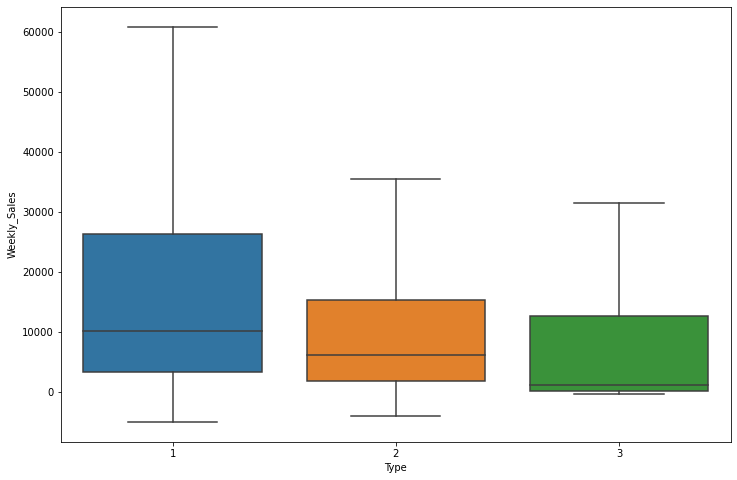

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(all_data["Type"],all_data["Weekly_Sales"],showfliers=False)

In [38]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(all_data["Size"],all_data["Weekly_Sales"]) 

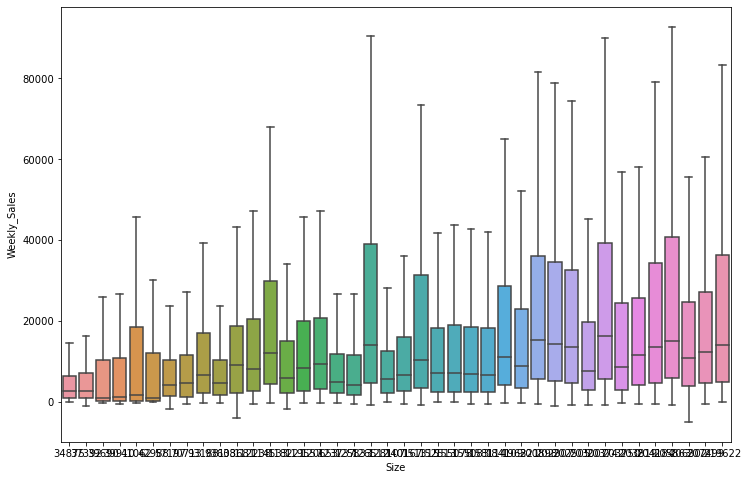

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(all_data["Size"],all_data["Weekly_Sales"],showfliers=False)

In [40]:
# python dtype
# https://rfriend.tistory.com/285#:~:text=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%98%95%ED%83%9C(Data%20Type%2C%20dtype,%EB%B6%80%ED%98%B8%20%EC%97%86%EB%8A%94%20%EC%A0%95%EC%88%98%ED%98%95%20(unsigned%20integers%20%2C
# pandas vs python dtype
# https://pbpython.com/pandas_dtypes.html

In [41]:
all_data["Date"] = all_data["Date"].astype("datetime64")
all_data["year"] = all_data["Date"].dt.year
all_data["month"] = all_data["Date"].dt.month
all_data["week"] = all_data["Date"].dt.week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [42]:
# # datetime data preprocessing
# train["Date"] = train["Date"].astype("datetime64")
# train["year"] = train["Date"].dt.year
# train["month"] = train["Date"].dt.month
# train["week"] = train["Date"].dt.week
# train

In [43]:
# test["Date"] = test["Date"].astype("datetime64")
# test["year"] = test["Date"].dt.year
# test["month"] = test["Date"].dt.month
# test["week"] = test["Date"].dt.week
# test # day, weekday, hour, minute, second

In [44]:
all_data2 = all_data.drop(["Date","Weekly_Sales"],1)

In [45]:
train2 = all_data2[:len(train)]
test2 = all_data2[len(train):]

In [46]:
# # prepare data for modeling
# train2 = train.drop(["Date","Weekly_Sales"],axis=1) # default 0
# test2 = test.drop("Date",1)

In [47]:
# model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=4)

In [48]:
rf.fit(train2,train["Weekly_Sales"])

RandomForestRegressor(n_jobs=4)

In [49]:
result = rf.predict(test2)

In [50]:
# Make submission file
sub = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip")
sub["Weekly_Sales"] = result
sub.to_csv("submission.csv",index=False)